In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

## Scientific functionality with SciPy

SciPy is a core module for doing science in Python. There are extensive tutorials online along with a clear API. We will cover a few important use cases for neuroscience research. [SciPy documentation](https://docs.scipy.org/doc/scipy/reference/)

# Section A: p-values and hypothesis testing

Video: [P-values and significance tests](https://www.khanacademy.org/math/ap-statistics/tests-significance-ap/idea-significance-tests/v/p-values-and-significance-tests) 7:57 [Khan academy video]

Self-test question(s):
<details>

<summary>The p-value is the probability of getting a result at least as extreme as the sample result by chance, assuming what? (assuming the null or the alternative hypothesis?)</summary>

the null hypothesis

</details>

### Examples: performing t-tests

A t-test allows you to determine whether two sets of measurements likely arose from distributions with different means. These measurements might be independent sets of measurements (i.e, two groups), or related sets of measurements (i.e. one group performing two tasks).

In [ ]:
import scipy

# generate some random data
x1 = np.random.normal(0, 1.0, [100]) # mean of 0 and std dev of 1
x2 = np.random.normal(0.2, 1.0, [100])  # mean of 0.2 and std dev of 1

# for independent data, e.g. two groups of subjects performing the same task 
t, p = scipy.stats.ttest_ind(x1, x2)
print(f"T: {t}, p: {p}")

# for repeated measurements of the same system, e.g. one subject performs a task with/without a manipulation
t, p = scipy.stats.ttest_rel(x1, x2)
print(f"T: {t}, p: {p}")

# Section B: Confidence intervals

Video: [Confidence Intervals - Introduction](https://www.youtube.com/watch?v=MbXThbTSrVI) 3:34

Self-test question(s):
<details>

<summary>What does it mean to be 95% confident that an interval captures the true mean?</summary>

If we were to take 100 samples of the same size and calculate intervals in the same way as in the first interval, we would expect 95 of these intervals to contain the population mean.

</details>

# Section C: Z-scores & data standardization

Video: [Z-Scores, Standardization, and the Standard Normal Distribution (5.3)](https://www.youtube.com/watch?v=2tuBREK_mgE) 6:56

Self-test question(s):
<details>

<summary>What does it mean for a value to have a Z-score of -2.5?</summary>

The value is two and a half standard deviations to the left (less than) of the mean.

</details>

### Example: Z-scoring to ensure different variables are on a common scale

Here we "standardize" columns of data by Z-scoring. This gives each data column a common scaling, which can be helpful for comparison purposes.

In [ ]:
# generating some fake data
X = np.hstack((np.random.normal(0, 1.0, [40, 20]), np.random.normal(0, 3.0, [40,20])))

# plot the data
ax = sns.heatmap(X, square=True)
ax.set_title('Raw data');

In [ ]:
# Standarize along the columns via z-scoring
X_z = scipy.stats.zscore(X, )

# plot the data
ax = sns.heatmap(X_z, square=True)
ax.set_title('Z-scored data');

# Section D: Bayesian probability: some plots

There are no additional videos or questions for this section, since we've already discussed Bayes' theorem. We just wanted to plot an example of what prior and posterior distributions might look like.

In this example, we will ask the question "how fair is a coin?" Given a coin, which might be weighted to one side, we'd like to know how likely it is that the coin will land on heads each time it is flipped.

We will model the coin flip as a Bernoulli process, which has one unknown parameter $p$.

The typical "frequentist" approach is to flip the coin a large number of times and create a 95% confidence interval for the value of $p$. The 95% confidence interval, however, does *not* mean that there's a 95% chance that the true value of $p$ is in that interval. This is an important interpretational point.

The Bayesian approach first has a prior distribution, then combines it with the likelihood function of any newly gathered data, to produce a posterior distribution.

A prior distribution is a function that maps from the unknown parameter $p$ to a probability density. In a hand-wavey sense, it basically represents the chance (before you gather data) that any given possible value of $p$ is the true value for the coin. There's no magical way to pick the correct prior distribution, you just have to base it on what could make scientific sense.

In this example, I will hand-wave over the actual calculation of the prior/likelihood/posterior, I will simply focus on what the data is, and what the plots look like.

### Part 1: A prior distribution

Let's say that you have some reason to believe that the coin might be biased towards heads, but you're not completely sure. Below might be a reasonable prior distribution.  Notice that it peaks at around a 67% chance of heads.

In [ ]:
from scipy.stats import beta

x = np.linspace(0, 1, 100)
y = beta.pdf(x, 3, 2)

plt.plot(x, y)
plt.legend(['prior'])
plt.title('How fair is the coin?')
plt.xlabel('Probability of Heads')
plt.ylabel('Density')
plt.xlim(0,1)
plt.ylim(0)
plt.show()

### Part 2: Gather some data

Let's say that you flip the coin 40 times and get some data. Let's say that 1 = heads, and 0 = tails

We can plot the data to see its distribution

In [ ]:
data = [0,1,0,0,1,1,0,0,0,0,0,0,1,0,1,0,0,1,0,0,1,1,0,0,0,1,0,0,1,0,0,0,1,1,0,0,0,0,1,0]

In [ ]:
sns.countplot(x=data)

### Part 3: Compute the likelihood function

In [ ]:
tails = data.count(0)
heads = data.count(1)

In [ ]:
x = np.linspace(0, 1, 100)
y = [p**heads * (1-p)**tails for p in x]

plt.plot(x, y)
plt.legend(['likelihood'])
plt.title('Likelihood Function')
plt.xlabel('Probability of Heads')
plt.ylabel('p(data)')
plt.xlim(0,1)
plt.ylim(0)
plt.show()

It's very common to look at the logarithm of the likelihood function rather than the likelihood function directly, since the likelihood function is usually close to zero for most of its domain (notice the scale of the y-axis in the above graph is 1e-11).

In [ ]:
x = np.linspace(0.01, 0.99, 100)
y = [np.log(p)*heads + np.log(1-p)*tails for p in x]

plt.plot(x, y)
plt.legend(['likelihood'])
plt.title('Log-Likelihood Function')
plt.xlabel('Probability of Heads')
plt.ylabel('ln(p(data))')
plt.xlim(0,1)
#plt.ylim(0)
plt.show()

### Part 4: Plot the posterior distribution

The posterior distribution indicates that the coin is very likely biased towards tails, based on the combination of prior belief plus new evidence. In this case, the evidence had much more weight than the prior, since we've switched from "biased towards heads" to "biased towards tails".

In [ ]:
x = np.linspace(0, 1, 100)
y = beta.pdf(x, 3, 2)
plt.plot(x, y, label='prior')
y = beta.pdf(x, 3+heads, 2+tails)
plt.plot(x, y, label='posterior')

plt.legend()
plt.title('How fair is the coin?')
plt.xlabel('Probability of Heads')
plt.ylabel('Density')
plt.xlim(0,1)
plt.ylim(0)
plt.show()

Bonus plot: We can show how the posterior distribution changes gradually when you gather data one flip at a time. The posterior after one flip becomes the prior before the next flip.

If we were to continue gathering data, the posterior distribution will become more precise (smaller variance) as we learn more about the true value of $p$.

In [ ]:
x = np.linspace(0, 1, 100)

for i in range(len(data)+1):
    truncated = data[0:i]
    y = beta.pdf(x, 3+truncated.count(1), 2+truncated.count(0))
    if i == 0:
        plt.plot(x, y, color = '#' + str(101010 + i*20101), label='prior')
    elif i == 40:
        plt.plot(x, y, color = '#' + str(101010 + i*20101), label='posterior')
    else:
        plt.plot(x, y, color = '#' + str(101010 + i*20101), label='_nolegend_')
    
plt.legend()
plt.title('Evolution from Prior to Posterior')
plt.xlabel('Probability of Heads')
plt.ylabel('Density')
plt.xlim(0,1)
plt.ylim(0)
plt.show()

# Section E: Linear regression (specifically least-squares regression)

Video: [Introduction to residuals and least-squares regression](https://www.khanacademy.org/math/ap-statistics/bivariate-data-ap/least-squares-regression/v/regression-residual-intro) 4:48

Self-test question(s):
<details>

<summary>In regression, what is a residual?</summary>

A residual is the difference between the y-value of a data point and its y-value as predicted by a regression line.

</details>
<details>

<summary>What do we minimize in least squares regression?</summary>

We minimize the sum of the squared residuals.

</details>

### Example: Performing linear regression using the scikit-learn library

### Machine learning with scikit-learn

Scikit-learn is the de facto machine learning toolbox for Python (not including deep learning). It also has a fantastic API for exploring what is possible:
- https://scikit-learn.org/stable/modules/classes.html

Some things you can do:
- Linear and nonlinear dimensionality reduction, regression, and classification
- Clustering
- Fancy types of cross-validation
- feature selection 
- compute lots of different metrics of model performance
- implementing new machine learning algorithms using a common object-oriented interface 
- develop sophisticated and clean pipelines for a reproducible machine learning / data analysis workflow 

### The following cell contains [an example modified from the scikit-learn website](https://scikit-learn.org/stable/auto_examples/linear_model/plot_ols.html).

In [ ]:
# Code source: Jaques Grobler
# License: BSD 3 clause

import matplotlib.pyplot as plt
import numpy as np
from sklearn import datasets, linear_model
from sklearn.metrics import mean_squared_error, r2_score

In [ ]:
# Load the diabetes dataset
diabetes_X, diabetes_y = datasets.load_diabetes(return_X_y=True)

# Use only one X feature
diabetes_X = diabetes_X[:, np.newaxis, 2]

# Plot the data
plt.scatter(diabetes_X, diabetes_y,  color='black')

plt.show()

In [ ]:
# Create linear regression object
regr = linear_model.LinearRegression()

# Train the model
regr.fit(diabetes_X, diabetes_y)

# Make predictions using the testing set
diabetes_y_pred = regr.predict(diabetes_X)

# Plot the data again
plt.scatter(diabetes_X, diabetes_y,  color='black')
# Plot the predicted line in blue
plt.plot(diabetes_X, diabetes_y_pred, color='blue', linewidth=3)

plt.show()

In [ ]:
# The coefficients
print('Coefficients: \n', regr.coef_)
# The intercept
print('Intercept: \n', regr.intercept_)

# The mean squared error
print('Mean squared error: %.2f'
      % mean_squared_error(diabetes_y, diabetes_y_pred))

# The coefficient of determination: 1 is perfect prediction
print('Coefficient of determination: %.2f'
      % r2_score(diabetes_y, diabetes_y_pred))

# Section F: Multiple regression

Video: [What Is And How To Use A Multiple Regression Equation Model Example](https://www.youtube.com/watch?v=ah-Q79TvBbs) 2:21

Self-test question(s):
<details>

<summary>In multiple regression, do we have multiple response variables, multiple explanatory variables, or both?</summary>

We have multiple explanatory variables (and a single response variable).

</details>
<details>

<summary>Why might we use multiple regression as opposed to simple linear regression?</summary>

With more explanatory varibles, we may be able to predict the response variable better. Additionally, we can see how each explanatory variable is associated with the response variable. Given the situation, we may also choose to compare the results of a multiple regression to those of a simple linear regression to see whether adding additional explanatory variables actually helps.

</details>

scikit-learn can be used to do multiple regression easily - instead of providing a 1D vector of x (explanatory) and a vector of y (response) varible values, you can provide a 2D matrix of x values with the y vector.

# Section G: Clustering

This section covers:

- The goal of clustering
- The concept of unsupervised learning
- K-means clustering
- Hierarchical clustering

First, watch this video: https://www.youtube.com/watch?v=4cxVDUybHrI (length 5:12)

Self-test question(s):

<details>
<summary>What is clustering?</summary>
The goal is to take high-dimensional (usually numerical) data, and group the points together into some number of clusters, so that data points within each cluster are similar to each other.
</details>

<details>
<summary>What distinguishes unsupervised learning from other categories of machine learning?</summary>
There is no "reponse class" in the data. With clustering, the goal is to assign categorical labels to different samples, but you don't have any "correct" labels to use as reference. Usually, you don't even know how many categories there are. Compare this to classification, where some of the data points (used for training) have the correct labels already assigned to them.
</details>

<details>
<summary>What parameter do you need to specify for K-means clustering?</summary>
You need to specify K, the number of clusters.
</details>

<details>
<summary>In hierarchical clustering, what does a dendrogram show?</summary>
The dendrogram shows how smaller clusters combine to form larger clusters. At the base of the dendrogram, each cluster is a single data point, and at the very top, there is only a single cluster containing all data points.
</details>

<details>
<summary>If you have 2D data (X and Y values for each data point) and you multiplied the X values by 10 while keeping the Y values the same, would the clusters remain the same?</summary>
Usually not, most clustering algorithms are affected by the scaling of your data.
</details>

In [ ]:
import pandas as pd
from sklearn.datasets import make_blobs
from sklearn.cluster import KMeans

In [ ]:
# generate some fake data
features, _ = make_blobs(
    n_samples=200,
    centers=3,
    cluster_std=2.75,
    random_state=46
)

features = pd.DataFrame(features,columns=['x','y'])

features

In [ ]:
# plot the data
sns.scatterplot(x='x',y='y',data=features);

### Part 1: K-means clustering

In [ ]:
# fit the kmeans model with 2 clusters
kmeans = KMeans(n_clusters=2, random_state=0).fit(features)

In [ ]:
# plot the data
sns.scatterplot(x='x',y='y',hue=kmeans.labels_,data=features);

# plot the centroids of the two clusters
sns.scatterplot(x=kmeans.cluster_centers_[:,0],y=kmeans.cluster_centers_[:,1],s=500,color='k',marker='x');

### Part 2: Hierarchical clustering

This will use a type of hierarchical clustering known as agglomerative clustering: clusters start small (individual data points) and are merged together to form bigger and bigger clusters.  This example is adjusted from the [sklearn website](https://scikit-learn.org/stable/auto_examples/cluster/plot_agglomerative_dendrogram.html#sphx-glr-auto-examples-cluster-plot-agglomerative-dendrogram-py)

In [ ]:
import numpy as np
from matplotlib import pyplot as plt
from scipy.cluster.hierarchy import dendrogram
from sklearn.datasets import load_iris
from sklearn.cluster import AgglomerativeClustering

# helper function to make a plot... just skim this
def plot_dendrogram(model, **kwargs):
    # Create linkage matrix and then plot the dendrogram

    # create the counts of samples under each node
    counts = np.zeros(model.children_.shape[0])
    n_samples = len(model.labels_)
    for i, merge in enumerate(model.children_):
        current_count = 0
        for child_idx in merge:
            if child_idx < n_samples:
                current_count += 1  # leaf node
            else:
                current_count += counts[child_idx - n_samples]
        counts[i] = current_count

    linkage_matrix = np.column_stack([model.children_, model.distances_,
                                      counts]).astype(float)

    # Plot the corresponding dendrogram
    dendrogram(linkage_matrix, **kwargs)


# setting distance_threshold=0 ensures we compute the full tree.
model = AgglomerativeClustering(distance_threshold=0, n_clusters=None)

model = model.fit(features)
plt.title('Hierarchical Clustering Dendrogram')
# plot the top three levels of the dendrogram
plot_dendrogram(model, truncate_mode='level', p=3)
plt.xlabel("Number of points in node (or index of point if no parenthesis).")
plt.show()

In [ ]:
# let's pick the top two clusters, and fit an Agglomerative Clustering model with it

model = AgglomerativeClustering(n_clusters=2)

model = model.fit(features)

In [ ]:
# plot the data
# notice the clusters are similar but slightly different
sns.scatterplot(x='x', y='y', hue=model.labels_, data=features);

# Section H: Dimensionality Reduction and Principal Component Analysis


Videos to watch:
- [Dimensionality Reduction | Introduction to Data Mining part 14](https://www.youtube.com/watch?v=F37gDOXQWWs) (duration 3:50)
- [Geometric intuition of PCA : Dimensionality reduction Lecture 12 @Applied AI Course](https://www.youtube.com/watch?v=ZUbogbEFSkg) (duration 13:47, the first 30 seconds are low resolution for some reason) 

Bonus videos (watch these on your own time later if you feel like it):
- [Dimensionality Reduction - The Math of Intelligence #5](https://www.youtube.com/watch?v=jPmV3j1dAv4) (duration 10:48)
- [Principal Component Analysis (PCA)](https://www.youtube.com/watch?v=fkf4IBRSeEc) (duration 13:45)

Self-test question(s):

<details>
<summary>What is the point of dimensionality reduction?</summary>
Many answers:
    
    - to find simple patterns in very complex data
    - to reduce the noise in the data
    - to make the data easier to visualize
    - to prepare the data for use with other data analysis techniques
</details>

<details>
<summary>What does PCA do in a geometric sense?</summary>
PCA rotates your data from one coordinate frame to another.  The original coordinate frame is made of the original features of the data, the new coordinate frame is made of the principal components.
</details>

<details>
<summary>Imagine you have 2D data (X and Y values for each data point), where X and Y are positively correlated. You transform the data (X,Y) into its principal components (PC1,PC2).  Are PC1 and PC2 correlated? </summary>
No, because PCA creates components that are independent of each other.
</details>

<details>
<summary>How does the variance of PC1 compare to the variance of PC2? </summary>
The principal components are defined such that the first component represents the direction with the highest variance.  So the variance of PC1 cannot be smaller than the variance of PC2.
</details>

<details>
<summary>If you have 2D data (X and Y values for each data point) and you multiplied the X values by 10 while keeping the Y values the same, would the PCA components remain the same?</summary>
No, because PCA is affected by scaling. If you change the scale of one feature, that changes the variance of that feature and thus the relative importance of that feature compared to others.
</details>

### Part 1: Example in 2D

In [ ]:
# generate some fake data
features, _ = make_blobs(
    n_samples=200,
    centers=3,
    cluster_std=2.75,
    random_state=49
)
features = pd.DataFrame(features,columns=['x1','x2'])

In [ ]:
# plot the data

fig = plt.figure(figsize=(7,7))
ax = fig.add_subplot(aspect='equal')
ax.set_xlim(-20,20)
ax.set_ylim(-20,20)
ax.set_title('Original Data')
sns.scatterplot(x='x1',y='x2',data=features,ax=ax);

In [ ]:
from sklearn.decomposition import PCA

pca = PCA()
pca.fit(features)

A scree plot is a type of plot that shows the tradeoff between the number of data dimensions and the amount of additional information provided by each additional dimension.  The more dimensions you choose to retain, the less each additional dimension contributes to explaining the variation within your data.

In the following scree plot, you should see that about 90% of the data variance is explained by a single dimension, while the second dimension only explains the remaining 10%.  So, you could choose to reduce this 2D data to 1D and retain the vast majority of the data's variance.

In [ ]:
plt.plot([1,2], pca.explained_variance_ratio_)

plt.xticks([1,2])
plt.ylim(0,1)
plt.xlabel('Component Number')
plt.ylabel('Ratio of Variance Explained')
plt.title('Scree Plot');

It is now possible to plot the pricipal component values for the data.  This is essentially a rotation of the data points from the original coordinate system (where each axis is an observed property) to a new coordinate system (in which each axis is a principal component).  The principal components are ordered based on their importance, so PC1 captures more variation than PC2.  If you had to convert this 2D data into 1D data for some reason, you'd keep the PC1 values and delete the PC2 values.

In [ ]:
transformed_features = pd.DataFrame(pca.transform(features), columns=['PC1','PC2'])

fig = plt.figure(figsize=(7,7))
ax = fig.add_subplot(aspect='equal')
ax.set_xlim(-20,20)
ax.set_ylim(-20,20)
ax.set_title('Transformed Data')
sns.scatterplot(x='PC1',y='PC2',data=transformed_features,ax=ax);

### Part 2: Example in 3D

In [ ]:
# generate some 3D fake data
features, _ = make_blobs(
    n_samples=200,
    centers=3,
    cluster_std=2.75,
    random_state=42
)
features = pd.DataFrame(features,columns=['x1','x2'])
features['x3'] = features['x1'] + 0.5 * features['x2'] + 5*np.random.rand(200)

features

In [ ]:
fig = plt.figure(figsize=((7,7)))
ax = fig.add_subplot(projection='3d')
ax.scatter(features['x1'],features['x2'],features['x3'])
ax.set_xlabel('x1')
ax.set_ylabel('x2')
ax.set_zlabel('x3');

In [ ]:
pca = PCA()
pca.fit(features)

In [ ]:
plt.plot([1,2,3], pca.explained_variance_ratio_)

plt.xticks([1,2,3])
plt.ylim(0,1)
plt.xlabel('Component Number')
plt.ylabel('Ratio of Variance Explained')
plt.title('Scree Plot')

Based on this scree plot, the data is almost entirely 2-dimensional, so we can reduce it from 3D to 2D and retain almost all of the useful information in the data.

In [ ]:
transformed_features = pd.DataFrame(pca.transform(features), columns=['PC1','PC2','PC3'])

fig = plt.figure(figsize=(7,7))
ax = fig.add_subplot(aspect='equal')
ax.set_xlim(-25,25)
ax.set_ylim(-25,25)
ax.set_title('Transformed Data')
sns.scatterplot(x='PC1',y='PC2',data=transformed_features,ax=ax);

Let's delete the 3rd principal component entirely

In [ ]:
transformed_features['PC3'] = 0

If we then perform the reverse transformation, we'll see that the reconstructed data (which is now a 2D plane in 3D space) still looks similar to the original data.  We deleted an entire dimension while keeping most of the information.

In [ ]:
inverse = pd.DataFrame(pca.inverse_transform(transformed_features), columns=['x1','x2','x3'])

fig = plt.figure(figsize=((7,7)))
ax = fig.add_subplot(projection='3d')
ax.scatter(inverse['x1'],inverse['x2'],inverse['x3'])
ax.set_xlabel('x1')
ax.set_ylabel('x2')
ax.set_zlabel('x3');

# Section I: Classification

Video: [Introduction to Classification Models](https://www.youtube.com/watch?v=8TuRJg76sW8) 2:45

Self-test question(s):
<details>

<summary>What does it mean that classification models are "supervised"?</summary>

The data that classification models learn from are "labeled" - the "true" classes associated with input data are provided for training the model.

</details>

## The following cell contains [an example modified from the scikit-learn website](https://scikit-learn.org/stable/auto_examples/linear_model/plot_iris_logistic.html#sphx-glr-auto-examples-linear-model-plot-iris-logistic-py).

The specific type of classifier used in the following example is a logistic regression classifier.

In [3]:
# Code source: Gaël Varoquaux
# Modified for documentation by Jaques Grobler
# License: BSD 3 clause

import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LogisticRegression
from sklearn import datasets

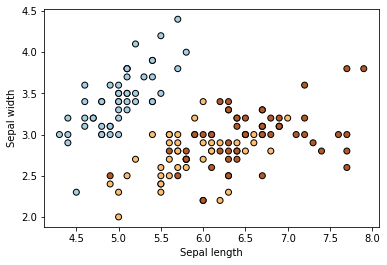

In [4]:
# import some data to play with
iris = datasets.load_iris()
X = iris.data[:, :2]  # we only take the first two features.
Y = iris.target

# plot the data

# Plot also the training points
plt.scatter(X[:, 0], X[:, 1], c=Y, edgecolors='k', cmap=plt.cm.Paired)
plt.xlabel('Sepal length')
plt.ylabel('Sepal width')

plt.show()

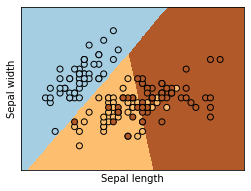

In [5]:
# Create an instance of Logistic Regression Classifier and fit the data.
logreg = LogisticRegression(C=1e5)
logreg.fit(X, Y)


# This is code to plot the decision boundary as colored regions.
# For that, we will assign a color to each
# point in the mesh [x_min, x_max]x[y_min, y_max].
x_min, x_max = X[:, 0].min() - .5, X[:, 0].max() + .5
y_min, y_max = X[:, 1].min() - .5, X[:, 1].max() + .5
h = .02  # step size in the mesh
xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))
Z = logreg.predict(np.c_[xx.ravel(), yy.ravel()])


# Put the result into a color plot
Z = Z.reshape(xx.shape)
plt.figure(1, figsize=(4, 3))
plt.pcolormesh(xx, yy, Z, cmap=plt.cm.Paired, shading='auto')


# Plot also the training points
plt.scatter(X[:, 0], X[:, 1], c=Y, edgecolors='k', cmap=plt.cm.Paired)
plt.xlabel('Sepal length')
plt.ylabel('Sepal width')


plt.xlim(xx.min(), xx.max())
plt.ylim(yy.min(), yy.max())
plt.xticks(())
plt.yticks(())

plt.show()

# Section J: Introduction to artificial neural networks (ANNs)

Video: [Neural Network In 5 Minutes | What Is A Neural Network? | How Neural Networks Work | Simplilearn](https://www.youtube.com/watch?v=bfmFfD2RIcg) 5:44

Self-test question(s):
<details>

<summary>What does a neural network adjust during learning to increase performance?</summary>

A neural network adjusts weights between nodes in its different layers according to errors during learning.

</details>

### Example link: [Performing classification using the pytorch library](https://pytorch.org/tutorials/beginner/blitz/cifar10_tutorial.html#sphx-glr-beginner-blitz-cifar10-tutorial-py)*

*The example link above is just to give you an idea of how using pytorch might look. You don't have to look at it closely. Please read the description of pytoch in the following cell though.

## Deep learning with pytorch

Most deep learning research in 2020 is done in Python using either PyTorch or Tensorflow. Most researchers (definitely at CMU) prefer PyTorch due to its more intuitive native interface (but see Keras for Tensorflow), more flexible dynamic graphs, and resultingly easier debugging experience. Industry tends to prefer Tensorflow since the static graphs run faster under certain circumstances. Both are highly capable. 

Pytorch is capable of:
- accelerating parallel computation by using a graphics processing card, with a very similar interface to numpy 
- training deep convolutional neural networks for computer vision tasks
- training recurrent neural networks for natural language processing and other dynamic tasks
- implementing state-of-the-art machine learning code, since so many researchers release their code publicly in PyTorch, and new important contributions are quickly incorporated into the pytorch API

We will cover pytorch in a future exercise. Feel free to check it out on your own time, too. 

# Section K: Point Processes

Watch this video: https://www.dropbox.com/s/ani888e7hhydn4q/5extraPointProcesses.mp4?dl=0 (length 6:09

Self-test question(s):

<details>
<summary>What are the various ways of representing data from a point process?</summary>
The answers:
    
    - a list of event times
    - a list of inter-event intervals
    - event counts (a function which increases over time)
</details>

<details>
<summary>How can you represent point process data in a more discrete manner?</summary>
You can represent it as a binary sequence by binning the original data into many short time intervals, and let 0 = no spike in that interval and 1 = yes a spike in that interval.
</details>

Imagine we recorded from a neuron for 1000 seconds (1000000 milliseconds) and the neuron had a 0.1% chance of spiking during each millisecond. This creates a binary time series which is similar to a poisson process.

In [6]:
# first neuron data
first_neuron = (np.random.uniform(size=1000000) < 0.001).astype(int)

Text(0.5, 0, 'time in milliseconds')

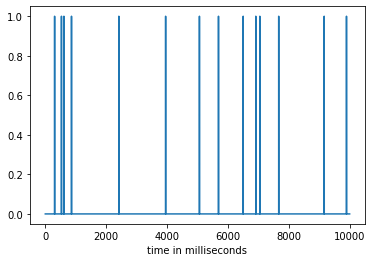

In [7]:
# plot the first 10 seconds of data
plt.plot(first_neuron[:10000])
plt.xlabel('time in milliseconds')

In [8]:
# now we want to count how many times the neuron spikes during each second
first_neuron_counts = np.array([second.sum() for second in np.split(first_neuron, 1000)])

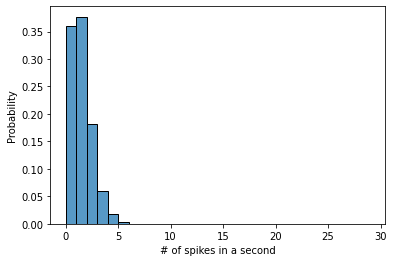

In [10]:
# histogram creates the (approximate) poisson distribution
import seaborn as sns

ax = sns.histplot(first_neuron_counts, bins=np.arange(30), stat='probability').set_xlabel('# of spikes in a second')

Now imagine that we had a neuron which had a 0.3% chance of spiking during each millisecond.

Text(0.5, 0, 'time in milliseconds')

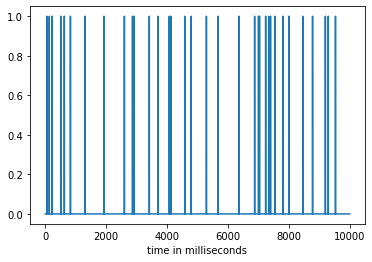

In [11]:
# second neuron data
second_neuron = (np.random.uniform(size=1000000) < 0.003).astype(int)
# plot the first 10 seconds of data
plt.plot(second_neuron[:10000])
plt.xlabel('time in milliseconds')

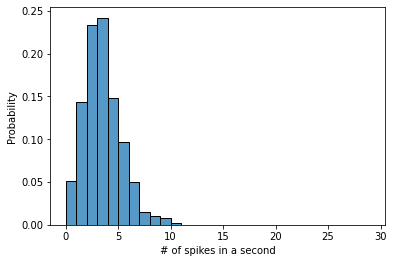

In [12]:
# now we want to count how many times the neuron spikes during each second
second_neuron_counts = np.array([second.sum() for second in np.split(second_neuron, 1000)])
# histogram creates the (approximate) poisson distribution
ax = sns.histplot(second_neuron_counts, bins=np.arange(30), stat='probability').set_xlabel('# of spikes in a second')

Now imagine that we had final neuron which had a 1.0% chance of spiking during each millisecond.

Text(0.5, 0, 'time in milliseconds')

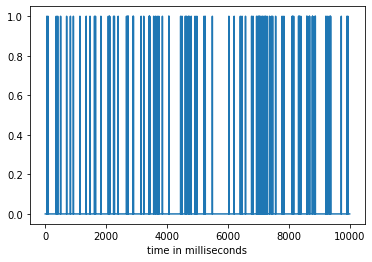

In [13]:
# third neuron data
third_neuron = (np.random.uniform(size=1000000) < 0.01).astype(int)
# plot the first 10 seconds of data
plt.plot(third_neuron[:10000])
plt.xlabel('time in milliseconds')

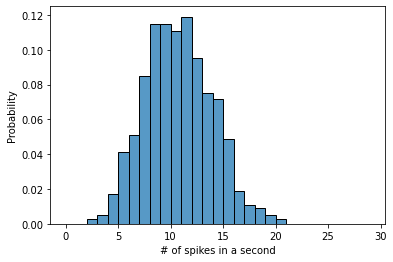

In [14]:
# now we want to count how many times the neuron spikes during each second
third_neuron_counts = np.array([second.sum() for second in np.split(third_neuron, 1000)])
# histogram creates the (approximate) poisson distribution
ax = sns.histplot(third_neuron_counts, bins=np.arange(30), stat='probability').set_xlabel('# of spikes in a second')

In Poisson-like point processes, the variance in the data increases as the mean increases.  With a perfect Poisson process, the variance in the number of spikes in a second is exactly equal to the expected value for the number of spikes in a second.

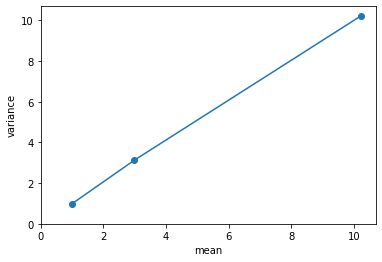

In [15]:
means = [
    first_neuron_counts.mean(),
    second_neuron_counts.mean(),
    third_neuron_counts.mean()
]

variances = [
    first_neuron_counts.var(),
    second_neuron_counts.var(),
    third_neuron_counts.var()
]

plt.plot(means,variances,marker='o')
plt.xlim(0)
plt.ylim(0)
plt.xlabel('mean')
plt.ylabel('variance');